# Recogida de datos

## Lectura del CSV

In [397]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [398]:
import pandas as pd


df = pd.read_csv(path+"creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## División de datos

In [399]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)

#df = pd.concat([X,Y],axis=1)
dfFraudes=pd.concat([df[df['Class']==1],df[df['Class']==0].sample(int(len(df[df['Class']==1])),random_state=42)])

dfSoloFraudes=df[df['Class']==1]
df = df[~df.isin(dfFraudes).all(1)]

dfFraudes=dfFraudes.sample(frac=1)

X_test = dfFraudes.drop("Class",axis=1)
y_test = dfFraudes['Class']

X_train,X_val,y_train,y_val = train_test_split(df.drop("Class",axis=1),df['Class'],test_size=0.2,random_state=42)

In [400]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
255545,157278.0,1.984787,-1.937036,0.486613,-1.245536,-2.518536,-0.544524,-1.819244,-0.074875,-0.659777,...,-0.127858,0.174011,0.889289,0.218248,0.492384,-0.584599,-0.135040,0.070319,-0.000205,120.00
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00
76163,56424.0,0.319007,-1.072867,-0.216146,1.494709,-0.627063,-0.761867,0.941687,-0.430272,-0.267431,...,0.914995,0.332521,-0.022461,-0.537691,0.452072,0.555495,-0.383543,-0.068520,0.106578,484.00
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,-0.108006,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33
271842,164776.0,1.947737,0.009899,-1.244776,1.302383,0.040133,-1.067379,0.301814,-0.311473,0.330881,...,-0.237873,0.279370,0.832769,-0.026910,-0.020475,0.268850,-0.425449,-0.005599,-0.046730,42.80
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00


In [401]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()

def estandar(x,col):
    v=s.fit_transform(x,col)
    return v[:,0],v[:,1]


X_train["Time"],X_train["Amount"] = estandar(X_train,['Time','Amount'])
X_val["Time"],X_val["Amount"] = estandar(X_val,['Time','Amount'])
X_test["Time"],X_test["Amount"] = estandar(X_test,['Time','Amount'])
dfSoloFraudes["Time"],dfSoloFraudes["Amount"] = estandar(dfSoloFraudes,['Time','Amount'])
#X_val = s.fit_transform(X_val)
#X_test = s.fit_transform(X_test)
dfSoloFraudes = dfSoloFraudes.drop("Class",axis=1)
dfSoloFraudes

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_19332\1184392403.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSoloFraudes["Time"],dfSoloFraudes["Amount"] = estandar(dfSoloFraudes,['Time','Amount'])


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-1.681237,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.362963
623,-1.679856,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.255048
4920,-1.596360,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.364273
6108,-1.543542,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.055185
6329,-1.532388,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,0.886287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.849785,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,0.419677
280143,1.854075,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.907584
280149,1.854159,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.604387
281144,1.867029,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.244676


# Predicción de Modelos

In [402]:
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

In [403]:
X_train.shape

(227058, 30)

In [404]:

encoder = keras.models.Sequential([
    keras.layers.Dense(20,input_shape=[X_train.shape[1]],activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(5, activation="relu")
])
encoder.summary()

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 885 (3.46 KB)

 Trainable params: 885 (3.46 KB)

 Non-trainable params: 0 (0.00 B)

In [405]:
decoder = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=[5], activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(X_train.shape[1]),
    #keras.layers.Reshape(22)
])
decoder.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 30)             │           630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 910 (3.55 KB)

 Trainable params: 910 (3.55 KB)

 Non-trainable params: 0 (0.00 B)

In [406]:
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_36 (Sequential)      │ ?                      │           885 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_37 (Sequential)      │ ?                      │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,795 (7.01 KB)

 Trainable params: 1,795 (7.01 KB)

 Non-trainable params: 0 (0.00 B)

In [407]:
autoencoder.compile(loss="mse", optimizer="adam")

In [408]:
import sys


early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = autoencoder.fit(X_train,X_train, epochs=10,
                          validation_data=[X_val, X_val],callbacks=[early_stopping_cb])

Epoch 1/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.6621 - val_loss: 0.4224
Epoch 2/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.4226 - val_loss: 0.3904
Epoch 3/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3835 - val_loss: 0.3755
Epoch 4/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3685 - val_loss: 0.3689
Epoch 5/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.3558 - val_loss: 0.3546
Epoch 6/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.3488 - val_loss: 0.3478
Epoch 7/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3443 - val_loss: 0.3344
Epoch 8/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3305 - val_loss: 0.3326
Epoch 9/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3256 - val_loss: 0.3259
Epoch 10/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3239 - val_loss: 0.3247


<Axes: >

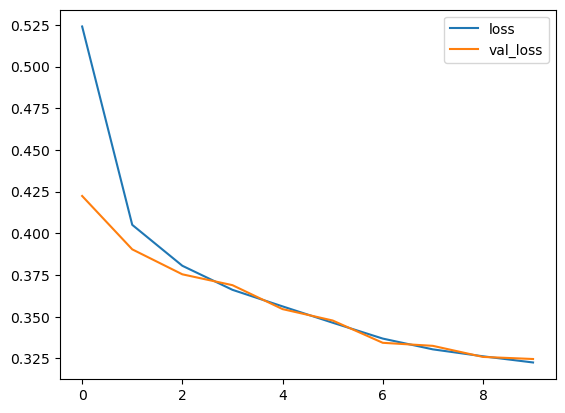

In [409]:
import pandas as pd

# Cuando hay una separación notable tras cruzada es el sobreentrenamiento
pd.DataFrame(history.history).plot()

In [410]:
autoencoder.evaluate(X_test,X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.3851 


9.60423469543457

In [411]:
dfSoloFraudes.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [412]:
dfSoloFraudes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 541 to 281674
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 22  V2

In [413]:
from sklearn.metrics import mean_squared_error

x = dfSoloFraudes
#y = dfSoloFraudes[:10]
predict = autoencoder.predict(x)
# Calcula el MSE para cada valor

mse_values_error = [np.sqrt(mean_squared_error([true_val], [pred_val])) for true_val, pred_val in zip(x.values, predict)]

#mse_values = mean_squared_error(x, predict)

#print(mse_values.mean())



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [414]:
mse_values_error

[1.719461567176949,
 1.0782369056072185,
 1.748004368566332,
 4.126573222518206,
 2.482845591902691,
 3.6461156933711747,
 3.6033517319598882,
 3.1051955343261035,
 3.0601218224207933,
 3.0963817675908656,
 3.1726589602513298,
 2.5301454917128154,
 3.0453958250693547,
 3.0844630364777905,
 3.2043789279175514,
 4.080563072002939,
 4.07316178609385,
 3.678636570267055,
 3.6225918596254645,
 3.528220985527445,
 3.5590976680182207,
 4.1427190117117885,
 4.23081622777445,
 4.266408606492564,
 2.298199450125661,
 7.474166277458481,
 3.0624590275589707,
 7.271444745038363,
 7.47662892547364,
 3.2153310602325496,
 4.1294014898097435,
 4.1154577302069715,
 2.5155657111560683,
 7.458675012297868,
 7.274406848768768,
 7.452960205850037,
 7.439317624829468,
 7.437116019322236,
 2.4363809817564563,
 0.5376750927521573,
 0.5037883713930418,
 0.4676349156751673,
 7.4351293110574375,
 7.436708824087725,
 8.450570582156253,
 7.760514085026418,
 7.422507876598611,
 7.6644077738749194,
 7.683216176835341

In [415]:
mse_values_error
st = np.std(mse_values_error)
st

2.4118576068893764

In [416]:
from sklearn.metrics import mean_squared_error

x = X_val
#y = dfSoloFraudes[:10]
predict = autoencoder.predict(x)

# Calcula el MSE para cada valor
mse_values = [np.sqrt(mean_squared_error([true_val], [pred_val])) for true_val, pred_val in zip(x.values, predict)]

#mse_values = mean_squared_error(x, predict)

#print(mse_values.mean())


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [417]:
mse_values

[0.430249155499323,
 0.45620166649764987,
 0.37322346261926886,
 0.4915629517706684,
 0.421362137292986,
 0.8650266769106639,
 0.5664593747108364,
 0.5263119765621747,
 0.35113261234475523,
 0.4795756400752817,
 0.6984125727370155,
 0.26982761345575196,
 0.537428074702713,
 0.5172449683872894,
 0.7031949706464268,
 0.4532516182094707,
 0.3579049839085783,
 0.4723266796018826,
 0.4855478093868604,
 0.3554083170010872,
 0.3809216416295443,
 0.4284605947496212,
 0.7133192484132885,
 0.21240468090226683,
 0.48406889894241356,
 0.2877681458524535,
 0.792860319693272,
 0.2691646454162421,
 0.41902985816758975,
 0.5361837685118314,
 1.6996805371297212,
 0.6311896887315099,
 0.33629375298109165,
 0.33349971763852465,
 0.7911796560318906,
 0.4597455460588453,
 0.682863827367052,
 0.3540882674816782,
 0.40789133104508424,
 0.4044333465082532,
 0.3885145039825326,
 0.7185130735506655,
 0.49026071128327553,
 0.3907750384019812,
 0.31124672716623164,
 0.3893251804961104,
 0.2627753793333849,
 0.498

In [418]:
mse_values
stNoFraudes = np.std(mse_values)
#range=[stNoFraudes*2+np.array(mse_values).mean(),np.array(mse_values).mean()-stNoFraudes*2]
stNoFraudes

0.23584693877881002

In [419]:
def detectar_fraude(predict,value):
    global mse_values_error,mse_values,st,stNoFraudes
    Lambda=(np.array(mse_values_error).mean()-np.array(mse_values).mean())/(st + stNoFraudes)
    margenError = (np.array(mse_values).mean()+Lambda)*stNoFraudes
    error=np.sqrt(mean_squared_error(predict,value))
    if error>Lambda:
        return 1
    return 0


x = X_test
#y = dfSoloFraudes[:10]
predict = autoencoder.predict(x)

# Calcula el MSE para cada valor
#mse_values = [np.sqrt(mean_squared_error([true_val], [pred_val])) for true_val, pred_val in zip(x, predict)]

errores=[]
for v,pred in zip(x.values,predict):
    errores.append(detectar_fraude(pred,v))


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


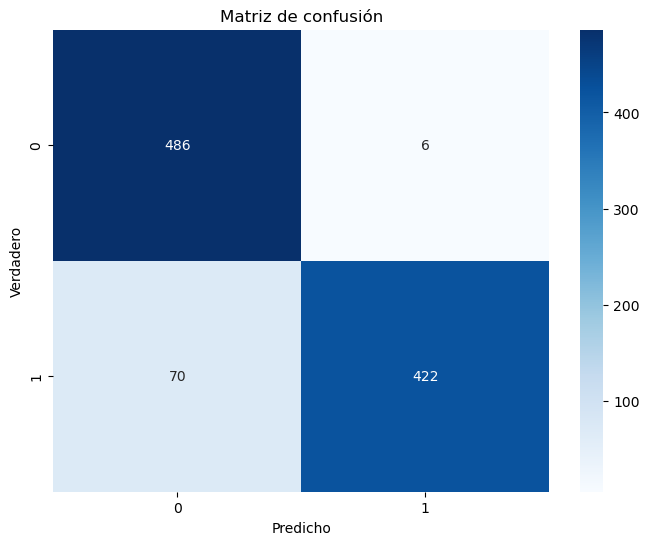

In [420]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, errores)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()